In [1]:
import platform
import os
from datetime import datetime

import numpy as np
from matplotlib import pyplot as plt

from Detector_Classes.DetectorConfigLoader import DetectorConfigLoader
from Detector_Classes.DreamDetector import DreamDetector

In [2]:
# Check if platform is Windows or Linux
if platform.system() == 'Windows':
    base_dir = 'F:/Saclay/cosmic_data/'
    det_type_info_dir = 'C:/Users/Dylan/PycharmProjects/Cosmic_Bench_DAQ_Control/config/detectors/'
    out_dir = 'F:/Saclay/Analysis/Cosmic Bench/11-5-24/'
    chunk_size = 5  # Number of files to process at once
elif platform.system() == 'Linux':
    base_dir = '/local/home/dn277127/Bureau/cosmic_data/'
    det_type_info_dir = '/local/home/dn277127/PycharmProjects/Cosmic_Bench_DAQ_Control/config/detectors/'
    out_dir = '/local/home/dn277127/Bureau/cosmic_data/Analysis/11-15-24/'
    chunk_size = 0.2  # Number of files to process at once
else:
    raise OSError('Unknown platform')

run_name = 'urw_inter_fe55_selftrig_3-26-25'
run_dir = f'{base_dir}{run_name}/'
sub_run_name = 'hv_380'

det_single = 'urw_inter'

file_nums = [0]
# file_nums = 'all'

noise_threshold_sigmas = 3

run_json_path = f'{run_dir}run_config.json'
data_dir = f'{run_dir}{sub_run_name}/filtered_root/'
ped_dir = f'{run_dir}{sub_run_name}/decoded_root/'

try:
    os.mkdir(out_dir)
except FileExistsError:
    pass

In [3]:
det_config_loader = DetectorConfigLoader(run_json_path, det_type_info_dir)

In [4]:
det_config = det_config_loader.get_det_config(det_single, sub_run_name=sub_run_name)
det = DreamDetector(config=det_config)
print(f'FEU Num: {det.feu_num}')
print(f'FEU Channels: {det.feu_connectors}')
print(f'HV: {det.hv}')

print(f'Detector center: {det.center}')
print(f'Detector active size: {det.active_size}')

# det.load_dream_data(data_dir, ped_dir, noise_threshold_sigmas, file_nums, chunk_size, hist_raw_amps=True, save_waveforms=True)
det.load_dream_data(data_dir, ped_dir, noise_threshold_sigmas, file_nums, chunk_size, hist_raw_amps=True, save_waveforms=False)
print(f'Hits shape: {det.dream_data.hits.shape}')

FEU Num: 6
FEU Channels: [1, 2, 3, 4]
HV: {'drift': 800, 'resist_1': 380}
Detector center: [ 10.   40.  712.7]
Detector active size: [127.125 127.      4.   ]
Reading in data...
Getting sub chunk 1/6, events: 0-4330 of 25982


100%|██████████| 1/1 [00:04<00:00,  4.01s/it]


Read in data shape: (4330, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 59.62it/s]


Fitting time: 0.13815522193908691 s
Processed sub-chunk 1/6
Getting sub chunk 2/6, events: 4330-8660 of 25982


100%|██████████| 1/1 [00:05<00:00,  5.36s/it]


Read in data shape: (4330, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 60.30it/s]


Fitting time: 0.1701068878173828 s
Processed sub-chunk 2/6
Getting sub chunk 3/6, events: 8660-12991 of 25982


100%|██████████| 1/1 [00:05<00:00,  5.38s/it]


Read in data shape: (4331, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 47.15it/s]

Fitting time: 0.19008731842041016 s


Processed sub-chunk 3/6
Getting sub chunk 4/6, events: 12991-17321 of 25982


100%|██████████| 1/1 [00:04<00:00,  4.99s/it]


Read in data shape: (4330, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 66.27it/s]


Fitting time: 0.181898832321167 s
Processed sub-chunk 4/6
Getting sub chunk 5/6, events: 17321-21651 of 25982


100%|██████████| 1/1 [00:04<00:00,  4.98s/it]


Read in data shape: (4330, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 62.83it/s]


Fitting time: 0.2089405059814453 s
Processed sub-chunk 5/6
Getting sub chunk 6/6, events: 21651-25982 of 25982


100%|██████████| 1/1 [00:04<00:00,  4.70s/it]


Read in data shape: (4331, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 67.69it/s]


Fitting time: 0.2238166332244873 s
Processed sub-chunk 6/6
Processed chunk 1/1
Getting hits...
Hits shape: (25982, 256)


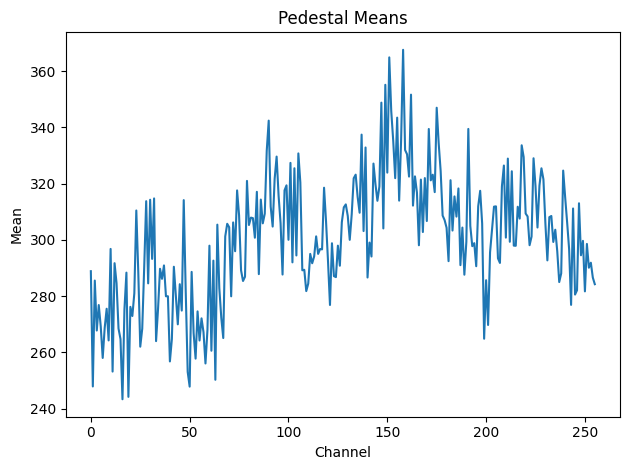

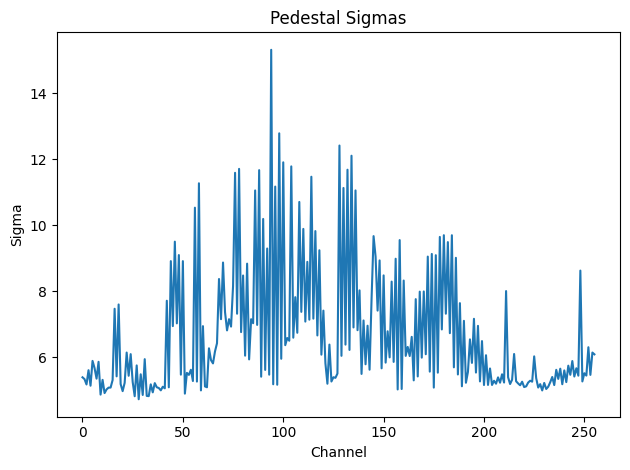

In [5]:
det.dream_data.plot_pedestals()

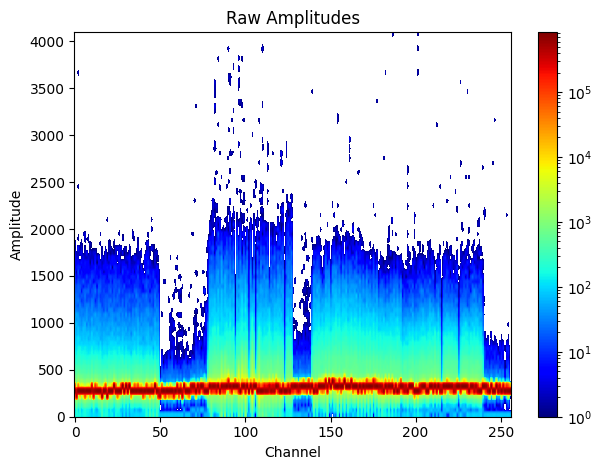

In [6]:
det.dream_data.plot_raw_amps_2d_hist()

In [7]:
# for event_num in range(min(len(det.dream_data.hits), 20)):
    # det.plot_event_1d(event_num)
    # det.plot_event_2d(event_num)
    # det.dream_data.plot_waveforms(event_num)

In [8]:
# det.dream_data.plot_noise_metric()

Connector 1 Dead Strips: []
Connector 2 Dead Strips: []
Connector 3 Dead Strips: []
Connector 4 Dead Strips: []


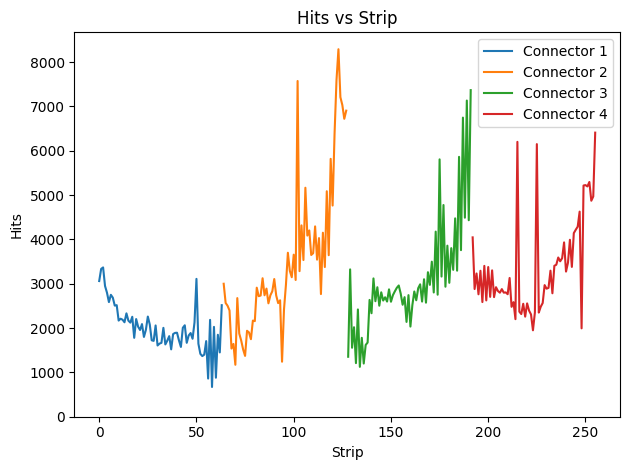

In [9]:
det.dream_data.plot_hits_vs_strip(print_dead_strips=True)

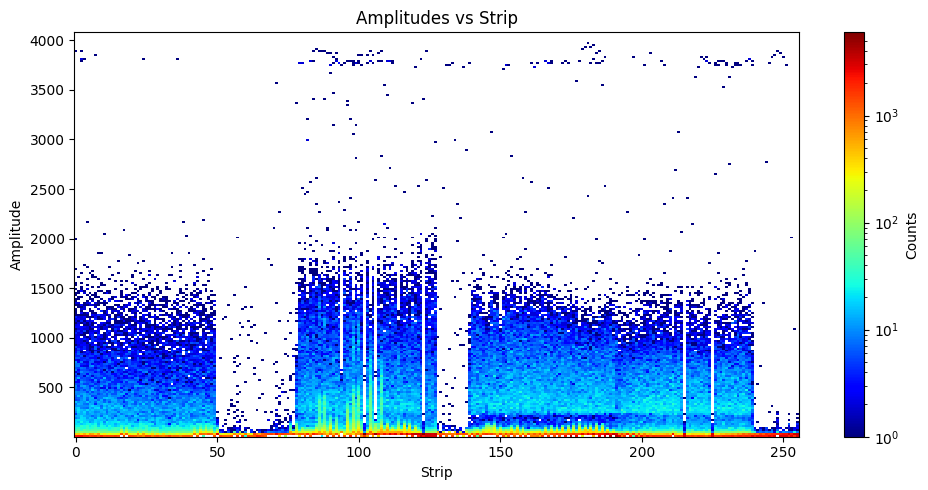

In [10]:
det.dream_data.plot_amplitudes_vs_strip()

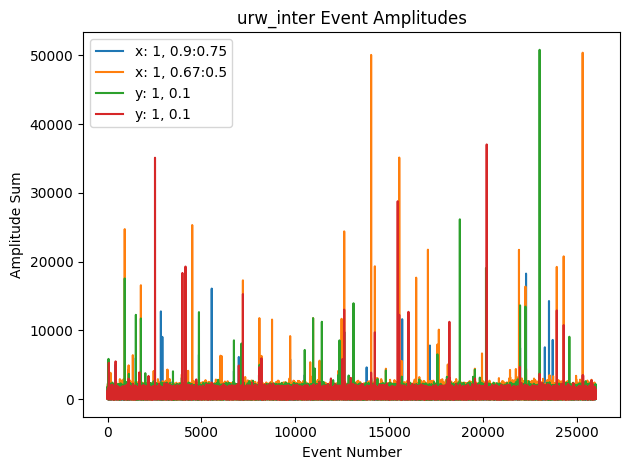

In [11]:
det.make_sub_detectors()
event_nums = det.plot_xy_amp_sum_vs_event_num(True, 500, False, 15)

# if realign_dream:
#     det.add_rotation(90, 'z')

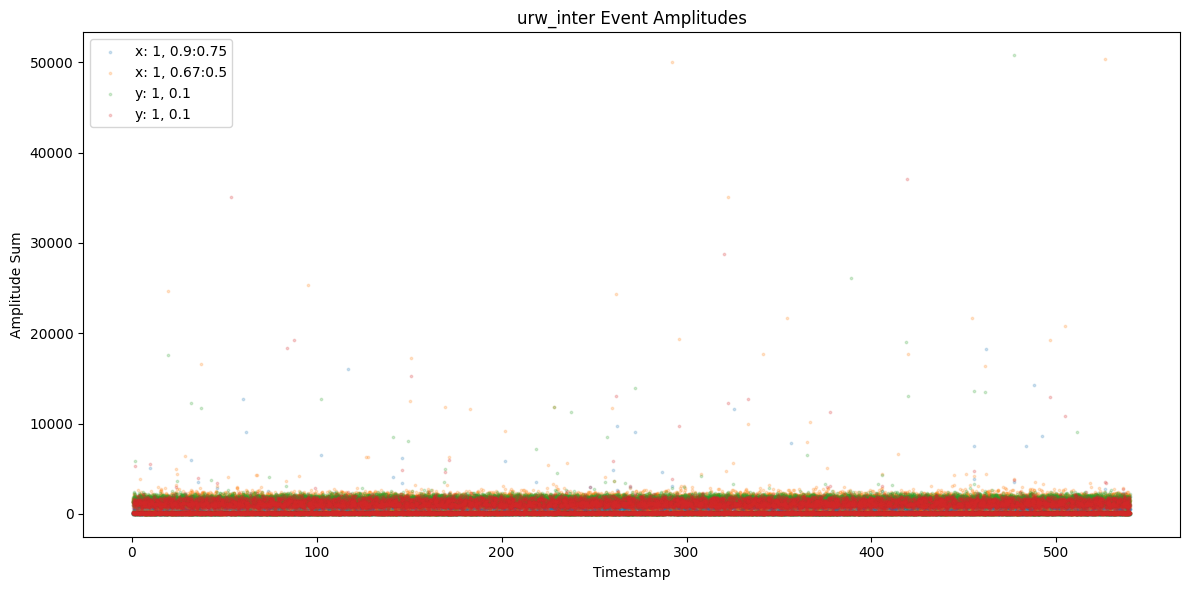

In [12]:
start_date_time = datetime(2025, 2, 27, 17, 25)
# det.plot_xy_amp_sum_vs_timestamp(x_range=(0, 2.7e13 / 1e8), t_start=start_date_time)
det.plot_xy_amp_sum_vs_timestamp()
# det.plot_xy_amp_sum_vs_timestamp(t_start=start_date_time)

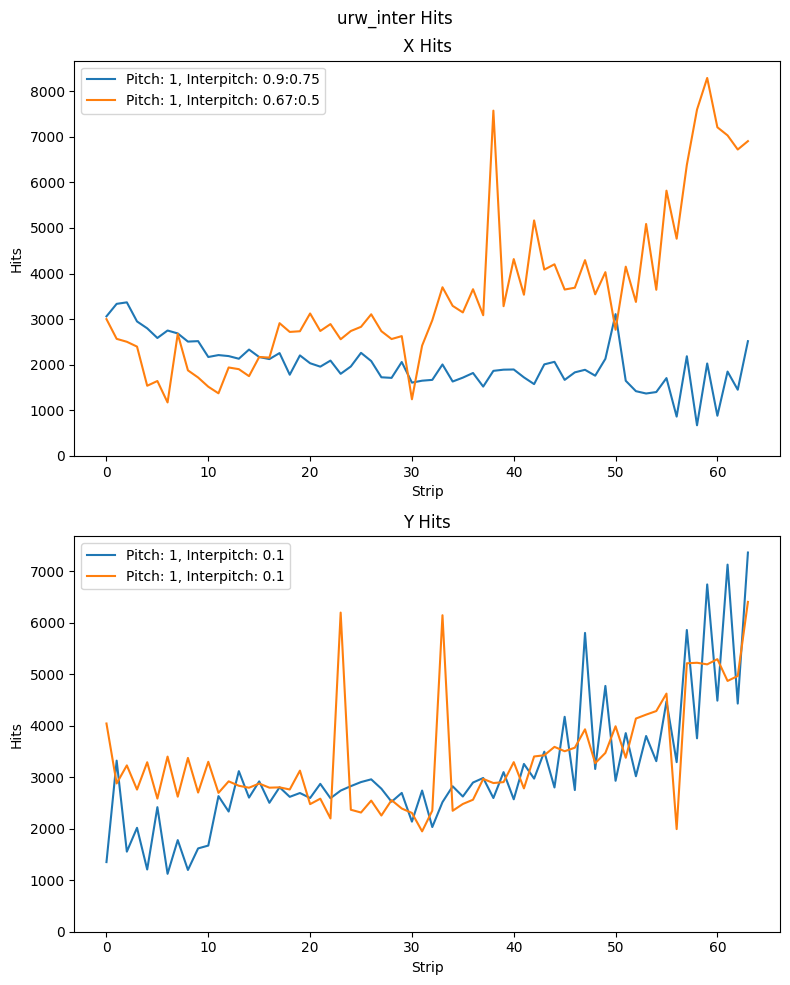

In [13]:
det.plot_hits_1d()

In [14]:
print(len(det.dream_data.hits))

25982


In [15]:
# for event_num in range(min(len(det.dream_data.hits), 2)):
#     det.plot_event_1d(event_num)
#     det.plot_event_2d(event_num)
#     det.dream_data.plot_waveforms(event_num)

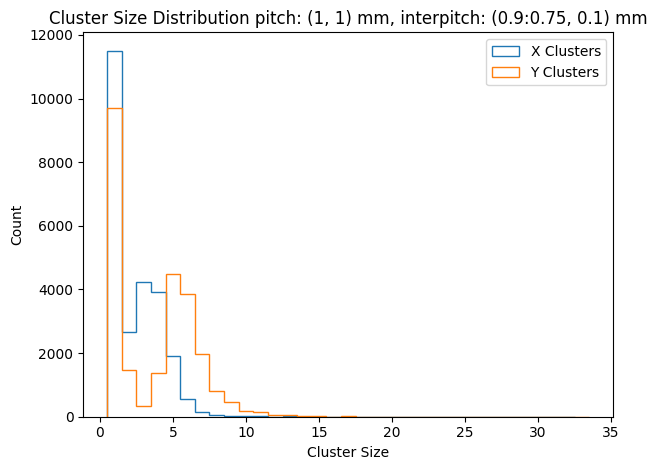

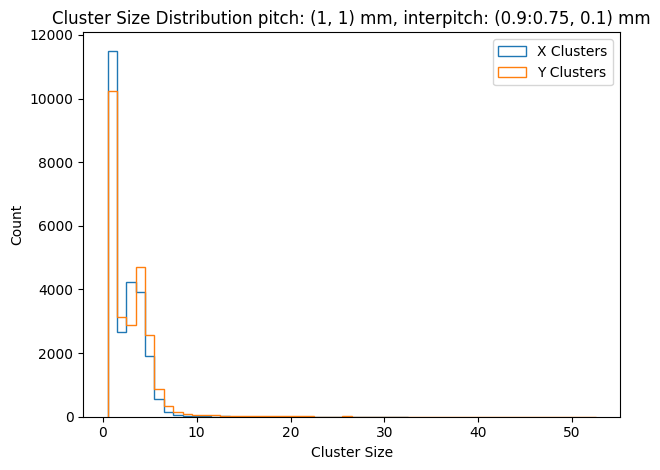

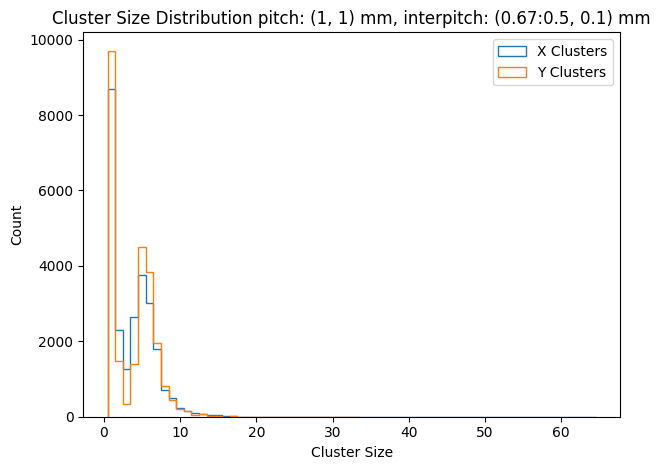

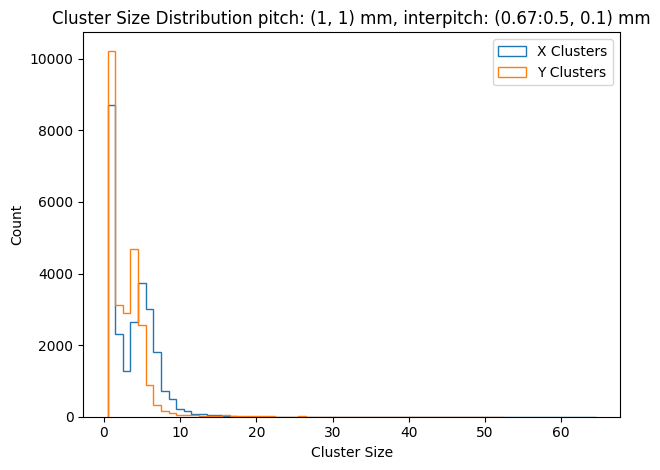

In [16]:
for sub_det in det.sub_detectors:
    sub_det.plot_cluster_sizes()

In [17]:
det.get_det_clusters()

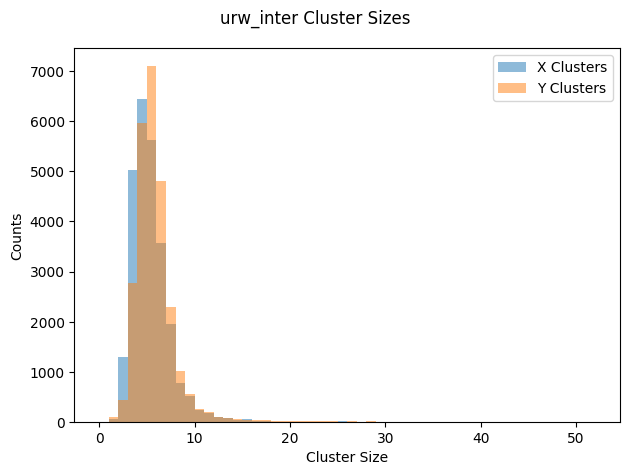

In [18]:
det.plot_cluster_sizes()

(25982,)


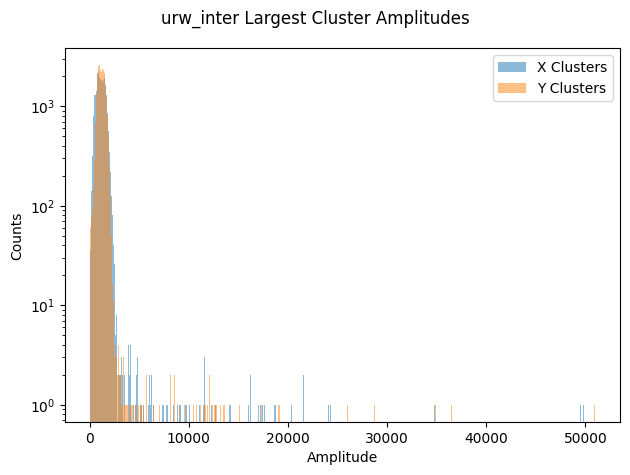

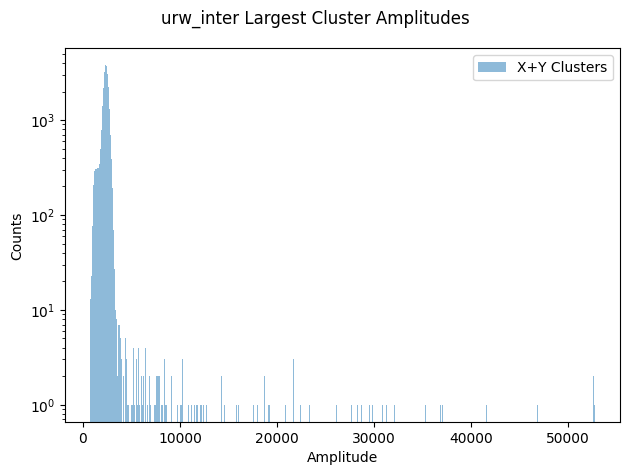

In [19]:
det.plot_cluster_amps()

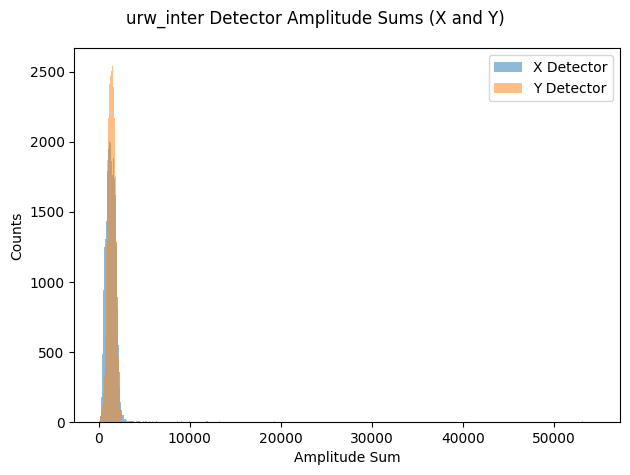

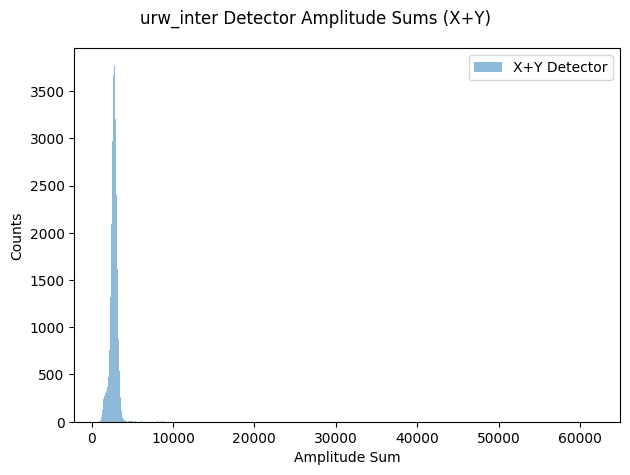

In [20]:
det.plot_det_amp_sums()

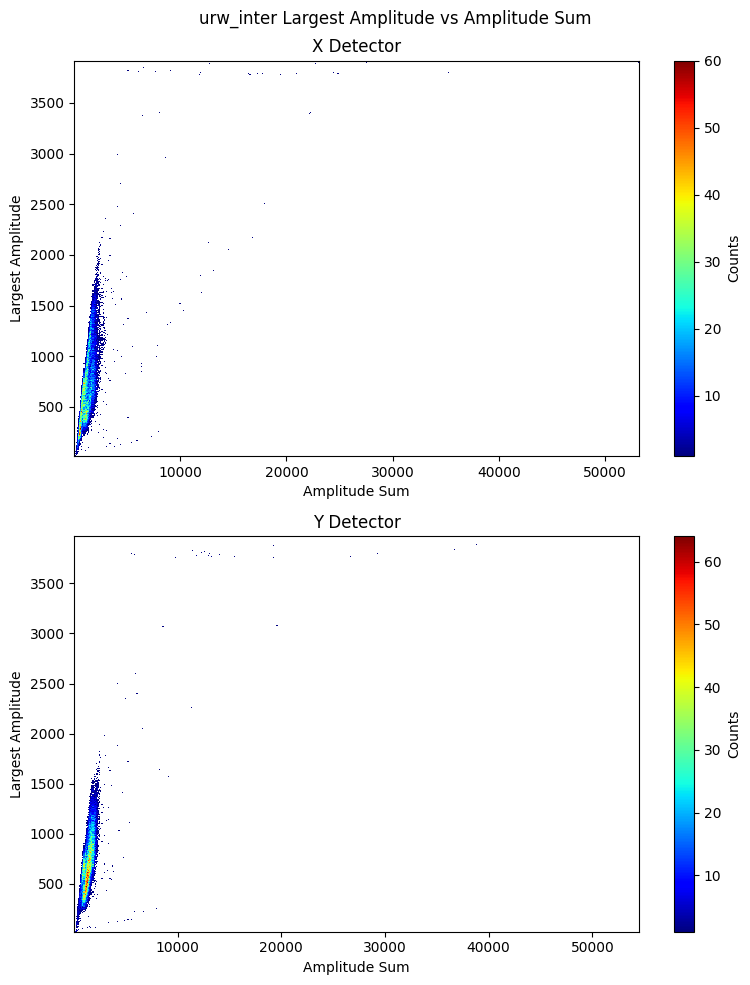

In [21]:
det.plot_det_largest_amp_vs_amp_sums(bins=500)

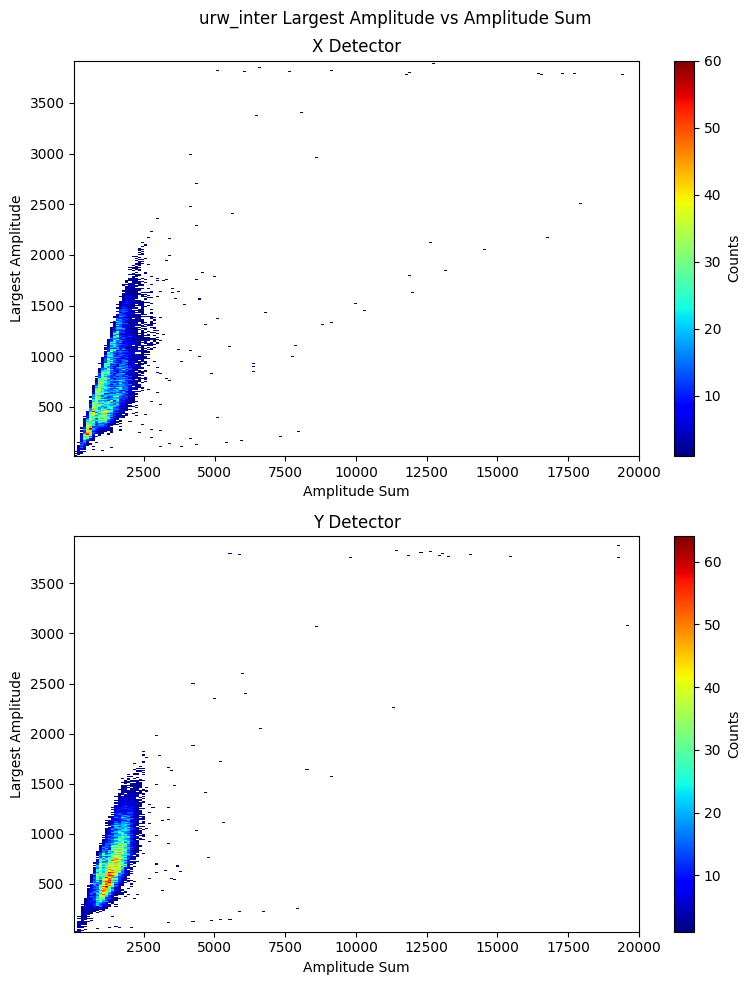

In [22]:
det.plot_det_largest_amp_vs_amp_sums(bins=500, x_max=20000)

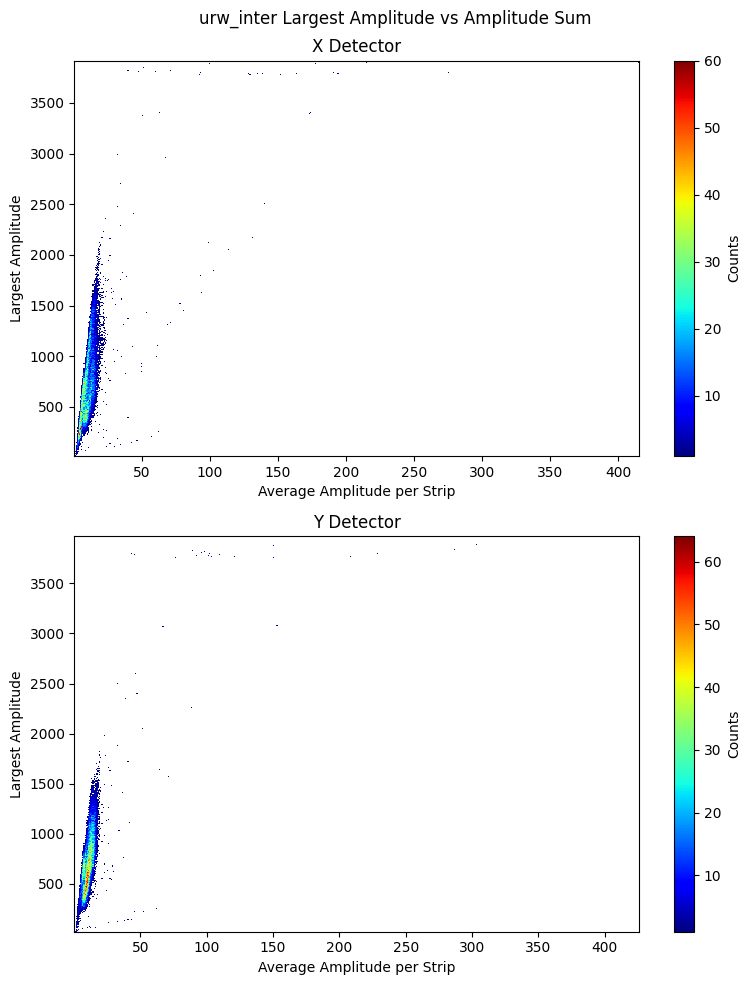

In [23]:
det.plot_det_largest_amp_vs_amp_sums(bins=500, norm_per_strip=True)

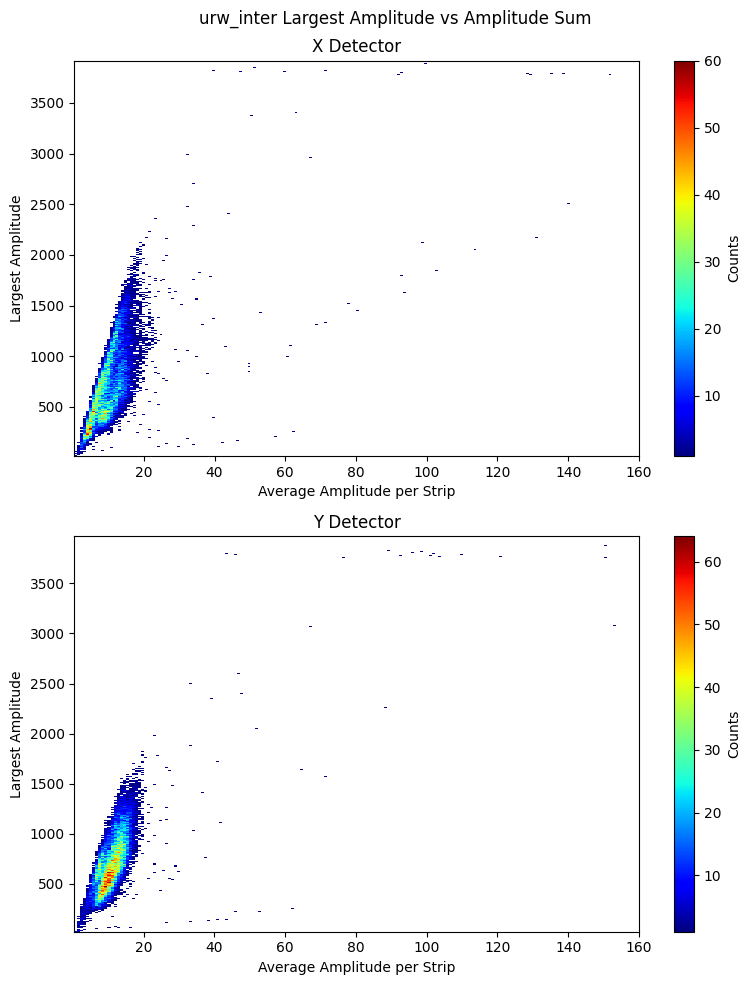

In [24]:
det.plot_det_largest_amp_vs_amp_sums(bins=500, x_max=160, norm_per_strip=True)

In [25]:
from scipy.optimize import curve_fit as cf
def gaus(x, a, mu, sigma):
    return a*np.exp(-(x-mu)**2/(2*sigma**2))

HV: {'drift': 800, 'resist_1': 380}
Reading in data...
Getting sub chunk 1/6, events: 0-4330 of 25982


100%|██████████| 1/1 [00:05<00:00,  5.81s/it]


Read in data shape: (4330, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 36.56it/s]


Fitting time: 0.23744750022888184 s
Processed sub-chunk 1/6
Getting sub chunk 2/6, events: 4330-8660 of 25982


100%|██████████| 1/1 [00:08<00:00,  8.32s/it]


Read in data shape: (4330, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 45.02it/s]


Fitting time: 0.2522716522216797 s
Processed sub-chunk 2/6
Getting sub chunk 3/6, events: 8660-12991 of 25982


100%|██████████| 1/1 [00:07<00:00,  7.84s/it]


Read in data shape: (4331, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 75.45it/s]


Fitting time: 0.1392831802368164 s
Processed sub-chunk 3/6
Getting sub chunk 4/6, events: 12991-17321 of 25982


100%|██████████| 1/1 [00:07<00:00,  7.38s/it]


Read in data shape: (4330, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 73.13it/s]


Fitting time: 0.16088652610778809 s
Processed sub-chunk 4/6
Getting sub chunk 5/6, events: 17321-21651 of 25982


100%|██████████| 1/1 [00:07<00:00,  7.72s/it]


Read in data shape: (4330, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 50.21it/s]


Fitting time: 0.24616169929504395 s
Processed sub-chunk 5/6
Getting sub chunk 6/6, events: 21651-25982 of 25982


100%|██████████| 1/1 [00:07<00:00,  7.86s/it]


Read in data shape: (4331, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 70.34it/s]


Fitting time: 0.5426557064056396 s
Processed sub-chunk 6/6
Processed chunk 1/1
Getting hits...
HV: hv_380 sum of sums: 72426248.66081361
p0: [np.float64(3765.0), np.float64(2832.6066627814716), np.float64(368.2388661615913)]
HV: {'drift': 800, 'resist_1': 385}
Reading in data...
Getting sub chunk 1/6, events: 0-4335 of 26010


100%|██████████| 1/1 [00:04<00:00,  4.13s/it]


Read in data shape: (4335, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 66.46it/s]


Fitting time: 0.1230001449584961 s
Processed sub-chunk 1/6
Getting sub chunk 2/6, events: 4335-8670 of 26010


100%|██████████| 1/1 [00:05<00:00,  5.90s/it]


Read in data shape: (4335, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 104.45it/s]


Fitting time: 0.11678791046142578 s
Processed sub-chunk 2/6
Getting sub chunk 3/6, events: 8670-13005 of 26010


100%|██████████| 1/1 [00:05<00:00,  5.87s/it]


Read in data shape: (4335, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 89.35it/s]


Fitting time: 0.11758065223693848 s
Processed sub-chunk 3/6
Getting sub chunk 4/6, events: 13005-17340 of 26010


100%|██████████| 1/1 [00:05<00:00,  5.39s/it]


Read in data shape: (4335, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 105.79it/s]


Fitting time: 0.12192130088806152 s
Processed sub-chunk 4/6
Getting sub chunk 5/6, events: 17340-21675 of 26010


100%|██████████| 1/1 [00:06<00:00,  6.02s/it]


Read in data shape: (4335, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 111.28it/s]


Fitting time: 0.3768746852874756 s
Processed sub-chunk 5/6
Getting sub chunk 6/6, events: 21675-26010 of 26010


100%|██████████| 1/1 [00:05<00:00,  5.48s/it]


Read in data shape: (4335, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 100.27it/s]


Fitting time: 0.18238019943237305 s
Processed sub-chunk 6/6
Processed chunk 1/1
Getting hits...
HV: hv_385 sum of sums: 84709011.36219409
p0: [np.float64(3820.0), np.float64(3284.4119040755872), np.float64(426.97354752982636)]
HV: {'drift': 800, 'resist_1': 390}
Reading in data...
Getting sub chunk 1/6, events: 0-4324 of 25947


100%|██████████| 1/1 [00:04<00:00,  4.09s/it]


Read in data shape: (4324, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 67.84it/s]


Fitting time: 0.11850953102111816 s
Processed sub-chunk 1/6
Getting sub chunk 2/6, events: 4324-8649 of 25947


100%|██████████| 1/1 [00:06<00:00,  6.59s/it]


Read in data shape: (4325, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 103.95it/s]


Fitting time: 0.12142205238342285 s
Processed sub-chunk 2/6
Getting sub chunk 3/6, events: 8649-12973 of 25947


100%|██████████| 1/1 [00:05<00:00,  5.37s/it]


Read in data shape: (4324, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 100.36it/s]


Fitting time: 0.1056520938873291 s
Processed sub-chunk 3/6
Getting sub chunk 4/6, events: 12973-17298 of 25947


100%|██████████| 1/1 [00:05<00:00,  5.67s/it]


Read in data shape: (4325, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 92.62it/s]


Fitting time: 0.12412071228027344 s
Processed sub-chunk 4/6
Getting sub chunk 5/6, events: 17298-21622 of 25947


100%|██████████| 1/1 [00:05<00:00,  5.84s/it]


Read in data shape: (4324, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 111.62it/s]


Fitting time: 0.13883495330810547 s
Processed sub-chunk 5/6
Getting sub chunk 6/6, events: 21622-25947 of 25947


100%|██████████| 1/1 [00:06<00:00,  6.22s/it]


Read in data shape: (4325, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 122.79it/s]

Fitting time: 0.1798563003540039 s


Processed sub-chunk 6/6
Processed chunk 1/1
Getting hits...
HV: hv_390 sum of sums: 99315069.41587107
p0: [np.float64(2287.0), np.float64(3927.194890738562), np.float64(510.5353357960131)]
HV: {'drift': 800, 'resist_1': 395}
Reading in data...
Getting sub chunk 1/6, events: 0-4328 of 25970


100%|██████████| 1/1 [00:04<00:00,  4.30s/it]


Read in data shape: (4328, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 70.72it/s]


Fitting time: 0.11746001243591309 s
Processed sub-chunk 1/6
Getting sub chunk 2/6, events: 4328-8656 of 25970


100%|██████████| 1/1 [00:06<00:00,  6.55s/it]


Read in data shape: (4328, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 101.51it/s]


Fitting time: 0.12601161003112793 s
Processed sub-chunk 2/6
Getting sub chunk 3/6, events: 8656-12985 of 25970


100%|██████████| 1/1 [00:05<00:00,  5.56s/it]


Read in data shape: (4329, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 97.72it/s]


Fitting time: 0.10911345481872559 s
Processed sub-chunk 3/6
Getting sub chunk 4/6, events: 12985-17313 of 25970


100%|██████████| 1/1 [00:06<00:00,  6.24s/it]


Read in data shape: (4328, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 106.30it/s]


Fitting time: 0.12299394607543945 s
Processed sub-chunk 4/6
Getting sub chunk 5/6, events: 17313-21641 of 25970


100%|██████████| 1/1 [00:06<00:00,  6.35s/it]


Read in data shape: (4328, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 114.14it/s]


Fitting time: 0.12449312210083008 s
Processed sub-chunk 5/6
Getting sub chunk 6/6, events: 21641-25970 of 25970


100%|██████████| 1/1 [00:06<00:00,  6.13s/it]


Read in data shape: (4329, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 89.45it/s]


Fitting time: 0.1656041145324707 s
Processed sub-chunk 6/6
Processed chunk 1/1
Getting hits...
HV: hv_395 sum of sums: 118248476.79037346
p0: [np.float64(1498.0), np.float64(4786.140345453123), np.float64(622.198244908906)]
HV: {'drift': 800, 'resist_1': 400}
Reading in data...
Getting sub chunk 1/6, events: 0-4333 of 26000


100%|██████████| 1/1 [00:03<00:00,  3.77s/it]


Read in data shape: (4333, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 87.94it/s]


Fitting time: 0.09521651268005371 s
Processed sub-chunk 1/6
Getting sub chunk 2/6, events: 4333-8666 of 26000


100%|██████████| 1/1 [00:06<00:00,  6.43s/it]


Read in data shape: (4333, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 106.04it/s]


Fitting time: 0.10945320129394531 s
Processed sub-chunk 2/6
Getting sub chunk 3/6, events: 8666-13000 of 26000


100%|██████████| 1/1 [00:04<00:00,  4.73s/it]


Read in data shape: (4334, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 73.61it/s]


Fitting time: 0.1380903720855713 s
Processed sub-chunk 3/6
Getting sub chunk 4/6, events: 13000-17333 of 26000


100%|██████████| 1/1 [00:06<00:00,  6.32s/it]


Read in data shape: (4333, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 91.97it/s]


Fitting time: 0.1284351348876953 s
Processed sub-chunk 4/6
Getting sub chunk 5/6, events: 17333-21666 of 26000


100%|██████████| 1/1 [00:05<00:00,  5.77s/it]


Read in data shape: (4333, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 101.06it/s]


Fitting time: 0.13315963745117188 s
Processed sub-chunk 5/6
Getting sub chunk 6/6, events: 21666-26000 of 26000


100%|██████████| 1/1 [00:05<00:00,  5.82s/it]


Read in data shape: (4334, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 84.82it/s]


Fitting time: 0.17181181907653809 s
Processed sub-chunk 6/6
Processed chunk 1/1
Getting hits...
HV: hv_400 sum of sums: 143273887.60281625
p0: [np.float64(1644.0), np.float64(5779.94729519328), np.float64(751.3931483751264)]
HV: {'drift': 800, 'resist_1': 405}
Reading in data...
Getting sub chunk 1/6, events: 0-4337 of 26025


100%|██████████| 1/1 [00:04<00:00,  4.90s/it]


Read in data shape: (4337, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 50.77it/s]


Fitting time: 0.16809868812561035 s
Processed sub-chunk 1/6
Getting sub chunk 2/6, events: 4337-8675 of 26025


100%|██████████| 1/1 [00:06<00:00,  6.68s/it]


Read in data shape: (4338, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 116.97it/s]


Fitting time: 0.10417795181274414 s
Processed sub-chunk 2/6
Getting sub chunk 3/6, events: 8675-13012 of 26025


100%|██████████| 1/1 [00:05<00:00,  5.43s/it]


Read in data shape: (4337, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 99.44it/s]


Fitting time: 0.10257577896118164 s
Processed sub-chunk 3/6
Getting sub chunk 4/6, events: 13012-17350 of 26025


100%|██████████| 1/1 [00:06<00:00,  6.33s/it]


Read in data shape: (4338, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 110.87it/s]


Fitting time: 0.10749578475952148 s
Processed sub-chunk 4/6
Getting sub chunk 5/6, events: 17350-21687 of 26025


100%|██████████| 1/1 [00:05<00:00,  5.57s/it]


Read in data shape: (4337, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 103.48it/s]


Fitting time: 0.14246797561645508 s
Processed sub-chunk 5/6
Getting sub chunk 6/6, events: 21687-26025 of 26025


100%|██████████| 1/1 [00:05<00:00,  5.40s/it]


Read in data shape: (4338, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 124.66it/s]


Fitting time: 0.1610424518585205 s
Processed sub-chunk 6/6
Processed chunk 1/1
Getting hits...
HV: hv_405 sum of sums: 174519193.63432488
p0: [np.float64(1400.0), np.float64(7357.924666276789), np.float64(956.5302066159826)]
HV: {'drift': 800, 'resist_1': 410}
Reading in data...
Getting sub chunk 1/6, events: 0-4327 of 25967


100%|██████████| 1/1 [00:04<00:00,  4.08s/it]


Read in data shape: (4327, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 118.28it/s]


Fitting time: 0.08716702461242676 s
Processed sub-chunk 1/6
Getting sub chunk 2/6, events: 4327-8655 of 25967


100%|██████████| 1/1 [00:06<00:00,  6.01s/it]


Read in data shape: (4328, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 97.28it/s]


Fitting time: 0.11623167991638184 s
Processed sub-chunk 2/6
Getting sub chunk 3/6, events: 8655-12983 of 25967


100%|██████████| 1/1 [00:05<00:00,  5.02s/it]


Read in data shape: (4328, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 105.70it/s]


Fitting time: 0.09980082511901855 s
Processed sub-chunk 3/6
Getting sub chunk 4/6, events: 12983-17311 of 25967


100%|██████████| 1/1 [00:05<00:00,  5.76s/it]


Read in data shape: (4328, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 102.49it/s]


Fitting time: 0.1130228042602539 s
Processed sub-chunk 4/6
Getting sub chunk 5/6, events: 17311-21639 of 25967


100%|██████████| 1/1 [00:05<00:00,  5.64s/it]


Read in data shape: (4328, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 101.05it/s]


Fitting time: 0.14405226707458496 s
Processed sub-chunk 5/6
Getting sub chunk 6/6, events: 21639-25967 of 25967


100%|██████████| 1/1 [00:05<00:00,  5.89s/it]


Read in data shape: (4328, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 118.30it/s]


Fitting time: 0.16439604759216309 s
Processed sub-chunk 6/6
Processed chunk 1/1
Getting hits...
HV: hv_410 sum of sums: 208311518.089075
p0: [np.float64(857.0), np.float64(8424.072957092794), np.float64(1095.1294844220633)]


Text(0, 0.5, 'Number of Events')

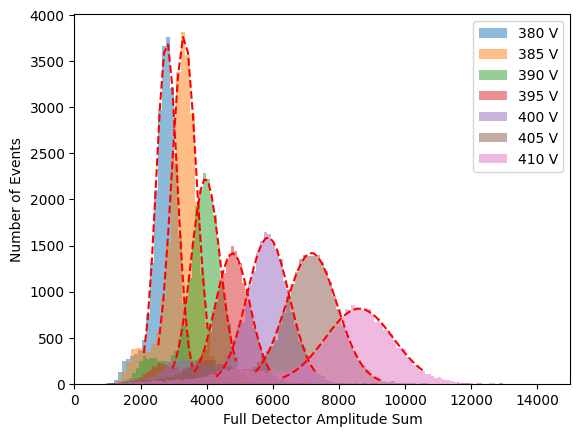

In [30]:
hvs = [380, 385, 390, 395, 400, 405, 410]
# hvs = [380, 410]
means, mean_x_largest_amp, mean_y_largest_amp = [], [], []
fig, ax = plt.subplots()
for hv in hvs:
    sub_run_name = f'hv_{hv}'
    data_dir = f'{run_dir}{sub_run_name}/filtered_root/'
    ped_dir = f'{run_dir}{sub_run_name}/decoded_root/'

    det_config = det_config_loader.get_det_config(det_single, sub_run_name=sub_run_name)
    det = DreamDetector(config=det_config)
    print(f'HV: {det.hv}')

    det.load_dream_data(data_dir, ped_dir, noise_threshold_sigmas, file_nums, chunk_size, hist_raw_amps=False, save_waveforms=False)
    det.make_sub_detectors()
    det.get_det_clusters()
    x_largest_amp = np.array(det.x_largest_amp)
    y_largest_amp = np.array(det.y_largest_amp)
    xy_det_sum = np.array(det.xy_det_sum)
    print(f'HV: {sub_run_name} sum of sums: {np.sum(xy_det_sum)}')
    hist, bin_edges, _ = ax.hist(xy_det_sum, bins=500, alpha=0.5, label=f'{hv} V')
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    p0 = [np.max(hist), bin_centers[np.argmax(hist)], bin_centers[np.argmax(hist)] * 0.13]
    print(f'p0: {p0}')
    fit_range = [p0[1] - 2 * p0[2], p0[1] + 2 * p0[2]]
    fit_filter = (bin_centers > fit_range[0]) & (bin_centers < fit_range[-1])
    x_fit, y_fit = bin_centers[fit_filter], hist[fit_filter]
    popt, pcov = cf(gaus, x_fit, y_fit, p0=p0)
    ax.plot(x_fit, gaus(x_fit, *popt), '--', color='r')

    means.append(popt[1])
    xy_det_sum_filter = (xy_det_sum > fit_range[0]) & (xy_det_sum < fit_range[1])
    mean_x_largest_amp.append(np.median(x_largest_amp[xy_det_sum_filter]))
    mean_y_largest_amp.append(np.median(y_largest_amp[xy_det_sum_filter]))

ax.legend()
ax.set_xlim(0, 15000)
ax.set_xlabel('Full Detector Amplitude Sum')
ax.set_ylabel('Number of Events')

[np.float64(2792.148675092713), np.float64(3316.9305475858837), np.float64(3968.4280874532274), np.float64(4785.679940304049), np.float64(5855.874596296542), np.float64(7169.779809041104), np.float64(8614.139016821926)]
[380, 385, 390, 395, 400, 405, 410]


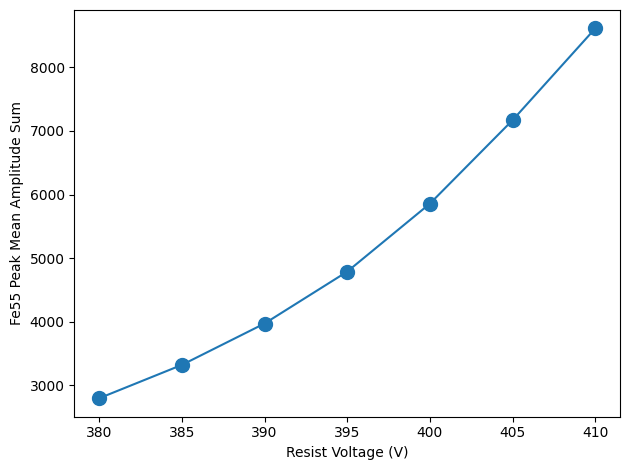

In [31]:
fig_means, ax_means = plt.subplots()
ax_means.clear()
print(means)
print(hvs)
ax_means.plot(hvs, means, marker='o', markersize=10)
ax_means.set_xlabel('Resist Voltage (V)')
ax_means.set_ylabel('Fe55 Peak Mean Amplitude Sum')
fig_means.tight_layout()

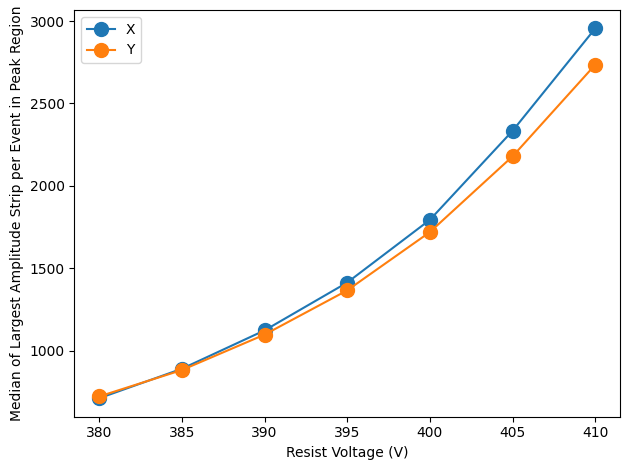

In [32]:
fig_largest_amps, ax_largest_amps = plt.subplots()
ax_largest_amps.clear()
ax_largest_amps.plot(hvs, mean_x_largest_amp, marker='o', markersize=10, label='X')
ax_largest_amps.plot(hvs, mean_y_largest_amp, marker='o', markersize=10, label='Y')
ax_largest_amps.set_xlabel('Resist Voltage (V)')
ax_largest_amps.set_ylabel('Median of Largest Amplitude Strip per Event in Peak Region')
ax_largest_amps.legend()
fig_largest_amps.tight_layout()
